# Investment Analysis Project
Spark Funds wants to make investments in a few companies. My job is to help CEO of spark funds to understand global trends in investments.
#### Spark Fund has two major constraints for investment.

- It wants to invest between 5 to 15 million USD per round of investment  
- It wants to invest only in English-speaking countries because of the ease of communication with the companies it   would invest in.

## Business objective:
The business objectives and goals of data analysis are pretty straightforward.

- __Business objective:__ The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.
- __Goals of data analysis:__  Goals are divided into three sub-goals:
 - _Investment type analysis:_ Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.
 -  _Country analysis_: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.
 - _Sector analysis:_ Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector(first string before the vertical bar will be considered the primary sector.))

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import copy
sns.set(style="white")

In [80]:
#reading files
companies = pd.read_csv('companies.txt', sep='\t', encoding = "ISO-8859-1")
rounds2 = pd.read_csv('rounds2.csv', encoding = "ISO-8859-1" )
mapping = pd.read_csv('mapping.csv')

In [81]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [82]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [83]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


# Checkpoint 1

In [84]:
#counting unique companies in companies by using counting unique(non-null) ID of the company
companies['permalink'].count()

66368

In [86]:
#we can also use following to count distinct values in casae there is any repeatation.
companies['permalink'].nunique()

66368

In [88]:
#converting columns to be merged to same case
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower() 
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [89]:
#unique number of companies in rounds2 table
rounds2['company_permalink'].nunique()

66370

In [90]:
#renaming column in rounds2 to merge both dataframes
rounds2 = rounds2.rename(columns={'company_permalink': 'permalink'})
master_frame = pd.merge(rounds2,companies,on='permalink')
master_frame


,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [91]:
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [92]:
#null value percentage in columns of master_frame
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [93]:
#Deleting two columns
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)

In [94]:
master_frame

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View


# Checkpoint 2

In [95]:
#after deletion null value percentage in columns of master_frame
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
dtype: float64

In [96]:
#deleting rows whose entry in column 'raised_amount_usd' is null
master_frame.dropna(subset=['raised_amount_usd'], inplace= True)
master_frame = master_frame.loc[master_frame['status'] !='closed']

In [97]:
#percent number of rows who have more than 3 null values in them
100*(len(master_frame[master_frame.isnull().sum(axis=1) > 3].index) / len(master_frame.index))

5.317224668100065

In [98]:
#Removing rows which have more than 3 null values
master_frame = master_frame[master_frame.isnull().sum(axis=1) <=3]

In [99]:
#null value percentage in columns of master_frame
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
homepage_url               3.69
category_list              0.51
status                     0.00
country_code               0.00
state_code                 1.89
region                     1.25
city                       1.25
dtype: float64

In [100]:
#Creatin a dataframe by grouping on 'funding_round_type'
master_grp = master_frame.groupby('funding_round_type')
master_grp['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,3980.0,9.944605e+05,8.099343e+06,0.0,157436.75,415000.0,1.000000e+06,4.945120e+08
convertible_note,1274.0,1.341047e+06,6.087816e+06,0.0,82229.50,300000.0,1.000000e+06,1.500000e+08
debt_financing,6126.0,1.789101e+07,2.925953e+08,0.0,349940.00,1100000.0,4.000000e+06,2.127194e+10
equity_crowdfunding,1125.0,5.117136e+05,1.757552e+06,0.0,5000.00,80148.0,3.390780e+05,2.740000e+07
grant,1862.0,4.286180e+06,2.512328e+07,0.0,62448.25,250000.0,2.000000e+06,7.500000e+08
non_equity_assistance,59.0,4.605890e+05,1.959476e+06,0.0,27000.00,60000.0,1.927670e+05,1.500000e+07
post_ipo_debt,138.0,1.754697e+08,6.296757e+08,70000.0,4017500.00,20000000.0,6.000000e+07,5.800000e+09
post_ipo_equity,547.0,6.709361e+07,2.136634e+08,77.0,3745981.00,12000000.0,3.938415e+07,3.200000e+09
private_equity,1730.0,7.578321e+07,2.061890e+08,0.0,5400000.00,21000000.0,7.682474e+07,4.745460e+09


In [168]:
# compare the median investment amount across the types
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
secondary_market         60000000.0
private_equity           21000000.0
post_ipo_debt            20000000.0
post_ipo_equity          12000000.0
venture                   5000000.0
debt_financing            1100000.0
undisclosed               1050000.0
angel                      415000.0
seed                       310109.5
convertible_note           300000.0
grant                      250000.0
product_crowdfunding       225889.0
equity_crowdfunding         80148.0
non_equity_assistance       60000.0
Name: raised_amount_usd, dtype: float64

The median investment amount for type 'private_equity' is approx. USD 20m, which is beyond Spark Funds' range of 5-15m. The median of 'venture' type is about USD 5m, which is suitable for them. The average amounts of angel and seed types are lower than their range.

Thus, 'venture' type investment will be most suited to them.

# Checkpoint 3

In [101]:
master_frame_venture = master_frame.loc[master_frame['funding_round_type']=='venture']

In [102]:
vent_country_group = master_frame_venture.pivot_table(values= 'raised_amount_usd',
                                                     index = 'country_code',
                                                     aggfunc = 'sum')
vent_country_group

,raised_amount_usd
country_code,
ARE,3.426175e+08
ARG,3.042888e+08
ARM,2.651750e+07
AUS,1.252745e+09
AUT,5.642971e+08
BAH,8.900000e+06
BEL,1.017140e+09
BGD,7.002000e+06
BGR,1.130000e+07


In [103]:
temp_top9 = vent_country_group.sort_values('raised_amount_usd',ascending= False)

In [104]:
temp_top9.reset_index(level=['country_code'],inplace=True)


In [105]:
temp_top9= temp_top9[0:9]
temp_top9

,country_code,raised_amount_usd
0,USA,3.999305e+11
1,CHN,3.906671e+10
2,GBR,1.818328e+10
3,IND,1.405060e+10
4,CAN,8.825487e+09
5,FRA,6.775044e+09
6,ISR,6.490721e+09
7,DEU,6.053973e+09
8,JPN,3.237132e+09


In [106]:
top9 = temp_top9.loc[:,'country_code']


In [107]:
top9

0    USA
1    CHN
2    GBR
3    IND
4    CAN
5    FRA
6    ISR
7    DEU
8    JPN
Name: country_code, dtype: object

In [108]:
eng_countries = ['USA','GBR', 'IND']


English speaking countries are United States of America(USA), United Kingdom(GBR), India(IND)

In [109]:
## Funding type that I want to advise to invest in is venture
FT = 'venture'

# Checkpoint 4

In [110]:
master_frame['primary_sector'] = master_frame["category_list"].str.split("|").str[0]

In [111]:
#converting the matrix mapping of primary_sector-category to one-one column format
mapping = mapping.loc[mapping['category_list'].notnull()]
mapping =mapping.set_index('category_list')
map_frame = mapping.stack().reset_index()
map_frame.columns=['primary_sector','main_sector','bin']


In [112]:
map_frame = map_frame.loc[map_frame['bin']==1]

In [113]:
map_frame = map_frame.drop('bin', axis=1)
map_frame

,primary_sector,main_sector
5,3D,Manufacturing
14,3D Printing,Manufacturing
23,3D Technology,Manufacturing
35,Accounting,"Social, Finance, Analytics, Advertising"
40,Active Lifestyle,Health
53,Ad Targeting,"Social, Finance, Analytics, Advertising"
59,Advanced Materials,Manufacturing
63,Adventure Travel,Automotive & Sports
80,Advertising,"Social, Finance, Analytics, Advertising"
89,Advertising Exchanges,"Social, Finance, Analytics, Advertising"


In [114]:
#merging primary_sector-main_sector with master_frame
master_frame2 = pd.merge(master_frame, map_frame, on='primary_sector')

In [115]:
master_frame2 = master_frame2.loc[master_frame2['funding_round_type']=='venture']

In [116]:
master_frame2

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Entertainment
7,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,Media,Entertainment
11,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.0,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,Media,Entertainment
12,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.0,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,Media,Entertainment
13,/organization/audiosocket,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1582300.0,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,Media,Entertainment
15,/organization/babble,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05-02-2009,2000000.0,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,Media,Entertainment
16,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,12-05-2009,1250000.0,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,Media,Entertainment


In [117]:
D1_temp = master_frame2.loc[(master_frame2['country_code']=='USA') & (master_frame2['raised_amount_usd']>= 5000000) & (master_frame2['raised_amount_usd']<= 15000000)]

In [118]:
D1 = copy.copy(D1_temp)

In [119]:
D1['no_invt_sec'] = D1.groupby('main_sector')['main_sector'].transform('count')

In [120]:
D1['total_invt_sec'] = D1.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [121]:
D1

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
7,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,Media,Entertainment,520,4.503765e+09
28,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,Media,Entertainment,520,4.503765e+09
50,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,Media,Entertainment,520,4.503765e+09
51,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,Media,Entertainment,520,4.503765e+09
73,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,13-05-2015,5000000.0,MEDIABONG,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,Media,Entertainment,520,4.503765e+09
82,/organization/newscorporation,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,08-01-2010,12500000.0,News Corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,Media,Entertainment,520,4.503765e+09
87,/organization/nokeena,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,08-08-2008,9400000.0,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,Media,Entertainment,520,4.503765e+09
89,/organization/nokeena,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,25-06-2009,6500000.0,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,Media,Entertainment,520,4.503765e+09
132,/organization/vadio,/funding-round/e1570c5060bf30b9972a2b0dc0562b02,venture,12-05-2015,7500000.0,Vadio,http://vadio.com,Media|Mobile|Video,operating,USA,OR,"Portland, Oregon",Portland,Media,Entertainment,520,4.503765e+09
153,/organization/aarohi-communication,/funding-round/84f519482b29b686a0c6b59ff383d386,venture,29-08-2003,6000000.0,Aarohi communication,http://www.aarohi.net/,Application Platforms|Communications Infrastru...,acquired,USA,CA,SF Bay Area,San Jose,Application Platforms,"News, Search and Messaging",1445,1.281416e+10


In [122]:
#total number of investments in C1
D1['funding_round_permalink'].count()

10404

In [123]:
#total amount of investment in C1
D1['raised_amount_usd'].sum()

93176222534.0

In [124]:
#No. of investment wise first,second and third sector in C1
D1_plt = D1.drop_duplicates(subset='main_sector', keep="last")
frm1 = D1_plt.nlargest(3,'no_invt_sec')
frm1.loc[:,'main_sector':'no_invt_sec']

,main_sector,no_invt_sec
76677,Others,2732
76603,Cleantech / Semiconductors,2145
76672,"Social, Finance, Analytics, Advertising",1813


In [125]:
D1_h1 = D1.loc[(D1['main_sector']=='Others') & (D1['raised_amount_usd']==D1['raised_amount_usd'].max())]
D1_h1

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
15825,/organization/1stdibs,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,24-01-2014,15000000.0,1stdibs,http://www.1stdibs.com,E-Commerce,operating,USA,NY,New York City,New York,E-Commerce,Others,2732,2.441447e+10
15995,/organization/avelle,/funding-round/8d1a79ae709467485ee52e1f4b6553b7,venture,15-06-2007,15000000.0,Bag Borrow or Steal,http://www.bagborroworsteal.com,E-Commerce|Fashion|Online Shopping,operating,USA,WA,Seattle,Seattle,E-Commerce,Others,2732,2.441447e+10
16089,/organization/betabrand,/funding-round/4ddea5471ec2e494ecd1d6f73e51b054,venture,21-10-2015,15000000.0,Betabrand,http://www.betabrand.com,E-Commerce|Fashion,operating,USA,CA,SF Bay Area,San Francisco,E-Commerce,Others,2732,2.441447e+10
16117,/organization/bigcommerce,/funding-round/b44702f6df9a109a631cdd30a4b0bc51,venture,01-08-2011,15000000.0,Bigcommerce,http://www.bigcommerce.com,E-Commerce|Online Shopping|Web Development,operating,USA,TX,Austin,Austin,E-Commerce,Others,2732,2.441447e+10
16156,/organization/bluefly,/funding-round/be2e014181419e038202dc6f0c3edbe2,venture,22-12-2009,15000000.0,Bluefly,http://www.bluefly.com,E-Commerce,ipo,USA,NY,New York City,New York,E-Commerce,Others,2732,2.441447e+10
16319,/organization/cashstar,/funding-round/5f1e307e4abc3e090eaaddb1f32082ae,venture,05-08-2015,15000000.0,CashStar,http://www.cashstar.com,E-Commerce|Incentives|Loyalty Programs|Payments,operating,USA,ME,"Portland, Maine",Portland,E-Commerce,Others,2732,2.441447e+10
16370,/organization/chloe-isabel,/funding-round/de87ffb40836fa241ee94f722c159065,venture,28-06-2014,15000000.0,Chloe + Isabel,http://chloeandisabel.com,E-Commerce|Fashion|Jewelry|Social Commerce,operating,USA,NY,New York City,New York,E-Commerce,Others,2732,2.441447e+10
16426,/organization/colorescience,/funding-round/81e25559eb001471d98c69b1cc0c2438,venture,16-09-2014,15000000.0,Colorescience,http://colorescience.com,E-Commerce,operating,USA,CA,San Diego,Carlsbad,E-Commerce,Others,2732,2.441447e+10
16597,/organization/e-rewards,/funding-round/11157ea89da1b4549761873cb8da945a,venture,01-01-1999,15000000.0,e-Rewards,http://www.e-rewardsinc.com,E-Commerce,operating,USA,TX,Dallas,Plano,E-Commerce,Others,2732,2.441447e+10
16659,/organization/endeca,/funding-round/002b802a4c38b896fd1fe3d9f425b4cb,venture,01-11-2001,15000000.0,Endeca,http://endeca.com,E-Commerce|Enterprises|Enterprise Software|Search,acquired,USA,MA,Boston,Cambridge,E-Commerce,Others,2732,2.441447e+10


In [126]:
D1_h2 = D1.loc[(D1['main_sector']=='Cleantech / Semiconductors') & (D1['raised_amount_usd']==D1['raised_amount_usd'].max())]
D1_h2

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
4213,/organization/480-biomedical,/funding-round/23d30096c6c31691dff8ff1b782eeba2,venture,14-02-2012,15000000.0,480 Biomedical,http://www.480biomedical.com,Biotechnology,operating,USA,MA,Boston,Watertown,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10
4274,/organization/acadia-pharmaceuticals,/funding-round/c3b4f7b8fa5d4c1aa1ce27005623a969,venture,11-01-2011,15000000.0,ACADIA Pharmaceuticals,http://www.acadia-pharm.com,Biotechnology|Health Care,ipo,USA,CA,San Diego,San Diego,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10
4373,/organization/active-implants,/funding-round/fad6ae551961c31cb509a85cc4b65761,venture,02-12-2009,15000000.0,Active Implants,http://www.activeimplants.com,Biotechnology,operating,USA,TN,Memphis,Memphis,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10
4383,/organization/acton-pharmaceuticals,/funding-round/e7f8c0b814873d9fae73faaf24f4cf19,venture,06-01-2010,15000000.0,Acton Pharmaceuticals,http://actonpharmaceuticals.com,Biotechnology,acquired,USA,MA,Boston,Marlborough,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10
4464,/organization/advanced-animal-diagnostics,/funding-round/1c25aa9afebfe5d5a851b69d3ab2974b,venture,08-12-2014,15000000.0,Advanced Animal Diagnostics,http://www.advancedanimaldiagnostics.com,Biotechnology|Health Diagnostics,operating,USA,NC,Raleigh,Durham,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10
4497,/organization/advandx,/funding-round/66e96a39ca89a66a38a0357e180d15db,venture,18-09-2007,15000000.0,AdvanDx,http://www.advandx.com,Biotechnology,acquired,USA,MA,Boston,Woburn,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10
4566,/organization/affinium-pharmaceuticals,/funding-round/01d9bbdcb326a2d0fae25f77511d4a71,venture,29-08-2011,15000000.0,Affinium Pharmaceuticals,http://www.afnm.com,Biotechnology|Health Care|Pharmaceuticals,acquired,USA,TX,Austin,Austin,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10
4623,/organization/agrivida,/funding-round/866421ca55ddce43117a9c405c38ecc4,venture,12-09-2012,15000000.0,Agrivida,http://www.agrivida.com,Biotechnology,operating,USA,MA,Boston,Cambridge,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10
4768,/organization/allena-pharmaceuticals,/funding-round/e6bf0d721724e3e94ae55fd837ab975a,venture,16-11-2011,15000000.0,Allena Pharmaceuticals,http://www.allenapharma.com,Biotechnology,operating,USA,MA,Boston,Newton,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10
4813,/organization/altherx-pharmaceuticals,/funding-round/ce8948f02186babc193b926fdff880a6,venture,02-05-2013,15000000.0,AltheRx Pharmaceuticals,http://altherx.com,Biotechnology,operating,USA,PA,Philadelphia,Exton,Biotechnology,Cleantech / Semiconductors,2145,1.972990e+10


In [127]:
D2_temp = master_frame2.loc[(master_frame2['country_code']=='GBR') & (master_frame2['raised_amount_usd']>= 5000000) & (master_frame2['raised_amount_usd']<= 15000000)]

In [128]:
D2 = copy.copy(D2_temp)

In [129]:
D2['no_invt_sec'] = D2.groupby('main_sector')['main_sector'].transform('count')

In [131]:
D2['total_invt_sec'] = D2.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [132]:
#total number of investments in C2
D2['funding_round_permalink'].count()

542

In [133]:
D2['raised_amount_usd'].sum()

4728734985.0

In [134]:
#No. of investment wise first,second and third sector in C2
D2_plt = D2.drop_duplicates(subset='main_sector', keep="last")
frm2 = D2_plt.nlargest(3,'no_invt_sec')
frm2.loc[:,'main_sector':'no_invt_sec']


,main_sector,no_invt_sec
76132,Others,137
76212,Cleantech / Semiconductors,114
74580,"Social, Finance, Analytics, Advertising",95


In [135]:
D2_h1 = D2.loc[(D2['main_sector']=='Others') & (D2['raised_amount_usd']==D2['raised_amount_usd'].max())]
D2_h1

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
17807,/organization/notonthehighstreet,/funding-round/1699ed5949d4d06bce01be9da7d9863f,venture,21-05-2012,15000000.0,Notonthehighstreet,http://www.notonthehighstreet.com,E-Commerce,operating,GBR,L1,London,Richmond,E-Commerce,Others,137,1.189442e+09
28111,/organization/azure-solutions,/funding-round/adb99f479490e33281ab358ba9da2b29,venture,16-06-2005,15000000.0,Azure Solutions,http://www.azuresolutions.com,Software,acquired,GBR,H9,London,London,Software,Others,137,1.189442e+09
29275,/organization/environmentiq,/funding-round/75dfc6681d2f93780158aff5fd9efcde,venture,06-03-2006,15000000.0,EnvironmentIQ,NaN,Software,operating,GBR,C3,London,Cambridge,Software,Others,137,1.189442e+09
30022,/organization/ip-access,/funding-round/4321163564fddf7a26b7235d7c791941,venture,12-12-2011,15000000.0,ip.access,http://www.ipaccess.com,Software,operating,GBR,C6,Camborne,Camborne,Software,Others,137,1.189442e+09
32547,/organization/tribold,/funding-round/36c8164caf2a5283a766e2a85b9d663c,venture,22-03-2007,15000000.0,Tribold,http://www.tribold.com,Software,acquired,GBR,H9,London,London,Software,Others,137,1.189442e+09
43732,/organization/silverrail-technologies,/funding-round/6816b97b970b7b95395f903ce1dd6d0d,venture,21-03-2012,15000000.0,SilverRail Technologies,http://silverrailtech.com,Technology|Transportation|Travel,operating,GBR,H9,London,London,Technology,Others,137,1.189442e+09
57365,/organization/sensage,/funding-round/39314de678e7cdba9b1b7390d23bc394,venture,09-04-2008,15000000.0,SenSage,http://www.sensage.com,Security,acquired,GBR,B3,London,Bracknell,Security,Others,137,1.189442e+09


In [136]:
D2_h2 = D2.loc[(D2['main_sector']=='Cleantech / Semiconductors') & (D2['raised_amount_usd']==D2['raised_amount_usd'].max())]
D2_h2

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
64377,/organization/elixent,/funding-round/11039f250826f795bfb1939629708907,venture,06-04-2005,15000000.0,Elixent,https://www.elixent.com,Semiconductors,operating,GBR,B7,Bristol,Bristol,Semiconductors,Cleantech / Semiconductors,114,1.028029e+09


In [137]:
D3_temp = master_frame2.loc[(master_frame2['country_code']=='IND') & (master_frame2['raised_amount_usd']>= 5000000) & (master_frame2['raised_amount_usd']<= 15000000)]

In [138]:
D3 = copy.copy(D3_temp)

In [139]:
D3['no_invt_sec'] = D3.groupby('main_sector')['main_sector'].transform('count')

In [140]:
D3['total_invt_sec'] = D3.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [141]:
#total number of investments in C3
D3['funding_round_permalink'].count()

287

In [142]:
D3['raised_amount_usd'].sum()

2569667552.0

In [143]:
D3_plt = D3.drop_duplicates(subset='main_sector', keep="last")
frm3 = D3_plt.nlargest(3,'no_invt_sec')
frm3.loc[:,'main_sector':'no_invt_sec']

,main_sector,no_invt_sec
74804,Others,102
76035,"News, Search and Messaging",49
74577,"Social, Finance, Analytics, Advertising",32


In [144]:
D3_h1 = D3.loc[(D3['main_sector']=='Others') & (D3['raised_amount_usd']==D3['raised_amount_usd'].max())]
D3_h1

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
16292,/organization/caratlane,/funding-round/ead9f057edb0d007c54f76e5cf5f2375,venture,13-05-2013,15000000.0,CaratLane,http://www.caratlane.com,E-Commerce|Jewelry,operating,IND,25,Chennai,Chennai,E-Commerce,Others,102,934289507.0
16797,/organization/firstcry-com,/funding-round/23b1769412d24510dfc7a56ab1f12e4d,venture,21-01-2014,15000000.0,FirstCry.com,http://www.firstcry.com,E-Commerce,operating,IND,16,Pune,Pune,E-Commerce,Others,102,934289507.0
17422,/organization/limeroad,/funding-round/8fb89dd64b186869e4fc63d83366eb12,venture,05-05-2014,15000000.0,LimeRoad,http://www.limeroad.com,E-Commerce|Social Media,operating,IND,10,New Delhi,Gurgaon,E-Commerce,Others,102,934289507.0
18031,/organization/pepperfry-com,/funding-round/de293ecb39aa0be2a16e36b47ab2da90,venture,27-05-2014,15000000.0,Pepperfry.com,http://www.pepperfry.com,E-Commerce,operating,IND,16,Mumbai,Mumbai,E-Commerce,Others,102,934289507.0
18289,/organization/roposo,/funding-round/0f647fc9ce894a49ec19697b6ab4deab,venture,17-08-2015,15000000.0,Roposo,http://www.roposo.com/,E-Commerce|Fashion,operating,IND,10,New Delhi,Gurgaon,E-Commerce,Others,102,934289507.0
18961,/organization/voylla-retail-pvt-ltd,/funding-round/e75b35919cefc102295d2be82651c6a2,venture,05-10-2015,15000000.0,Voylla Retail Pvt. Ltd.,http://www.voylla.com,E-Commerce,operating,IND,19,Bangalore,Bangalore,E-Commerce,Others,102,934289507.0
25077,/organization/zo-rooms,/funding-round/c88cfb5fe8cc31d33a07b73aa97c0e04,venture,20-07-2015,15000000.0,ZO Rooms,http://bit.ly/1HTcZ90,Hospitality|Hotels,operating,IND,7,New Delhi,New Delhi,Hospitality,Others,102,934289507.0
33844,/organization/girnarsoft,/funding-round/f5be3a7b98fb70b0e2b1d019357dd782,venture,20-11-2013,15000000.0,GirnarSoft,http://www.girnarsoft.com,Enterprise Software|Mobile Software Tools|Mobi...,operating,IND,24,Jaipur,Jaipur,Enterprise Software,Others,102,934289507.0
44802,/organization/classteacher-learning-systems,/funding-round/8be54e916f26b7702504530e6719305f,venture,27-06-2011,15000000.0,Classteacher Learning Systems,http://www.classteacher.com,EdTech|Education,operating,IND,10,New Delhi,Gurgaon,EdTech,Others,102,934289507.0
44950,/organization/k-12-techno-services,/funding-round/68574f53ff9d3c64f929e6134c62b391,venture,08-09-2010,15000000.0,K-12 Techno Services,http://k12technoservices.com,EdTech|Education,operating,IND,2,Secunderabad,Secunderabad,EdTech,Others,102,934289507.0


In [145]:
D3_h2 = D3.loc[(D3['main_sector']=='News, Search and Messaging') & (D3['raised_amount_usd']==D3['raised_amount_usd'].max())]
D3_h2

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
14615,/organization/mobile2win-india,/funding-round/50396c66ef239f1d5afea76ca98a76c4,venture,13-11-2006,15000000.0,Mobile2Win India,http://www.mobile2win.com,Mobile,operating,IND,16,Mumbai,Mumbai,Mobile,"News, Search and Messaging",49,408834545.0


# Checkponit 5

A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [146]:
chart1 = master_grp['raised_amount_usd'].describe()


In [147]:
chart1.reset_index(level=['funding_round_type'],inplace=True)

In [148]:
total_count = chart1['count'].sum()

In [149]:
total_count

83229.0

In [150]:
chart1['fraction'] = chart1['count']/total_count

In [151]:
investment_given =['venture','private_equity','seed']

In [152]:
chart1

,funding_round_type,count,mean,std,min,25%,50%,75%,max,fraction
0,angel,3980.0,9.944605e+05,8.099343e+06,0.0,157436.75,415000.0,1.000000e+06,4.945120e+08,0.047820
1,convertible_note,1274.0,1.341047e+06,6.087816e+06,0.0,82229.50,300000.0,1.000000e+06,1.500000e+08,0.015307
2,debt_financing,6126.0,1.789101e+07,2.925953e+08,0.0,349940.00,1100000.0,4.000000e+06,2.127194e+10,0.073604
3,equity_crowdfunding,1125.0,5.117136e+05,1.757552e+06,0.0,5000.00,80148.0,3.390780e+05,2.740000e+07,0.013517
4,grant,1862.0,4.286180e+06,2.512328e+07,0.0,62448.25,250000.0,2.000000e+06,7.500000e+08,0.022372
5,non_equity_assistance,59.0,4.605890e+05,1.959476e+06,0.0,27000.00,60000.0,1.927670e+05,1.500000e+07,0.000709
6,post_ipo_debt,138.0,1.754697e+08,6.296757e+08,70000.0,4017500.00,20000000.0,6.000000e+07,5.800000e+09,0.001658
7,post_ipo_equity,547.0,6.709361e+07,2.136634e+08,77.0,3745981.00,12000000.0,3.938415e+07,3.200000e+09,0.006572
8,private_equity,1730.0,7.578321e+07,2.061890e+08,0.0,5400000.00,21000000.0,7.682474e+07,4.745460e+09,0.020786
9,product_crowdfunding,321.0,1.521050e+06,5.093079e+06,0.0,52056.00,225889.0,8.050000e+05,5.200000e+07,0.003857


In [153]:
chart1_plt = chart1.loc[chart1['funding_round_type'].isin(investment_given)]

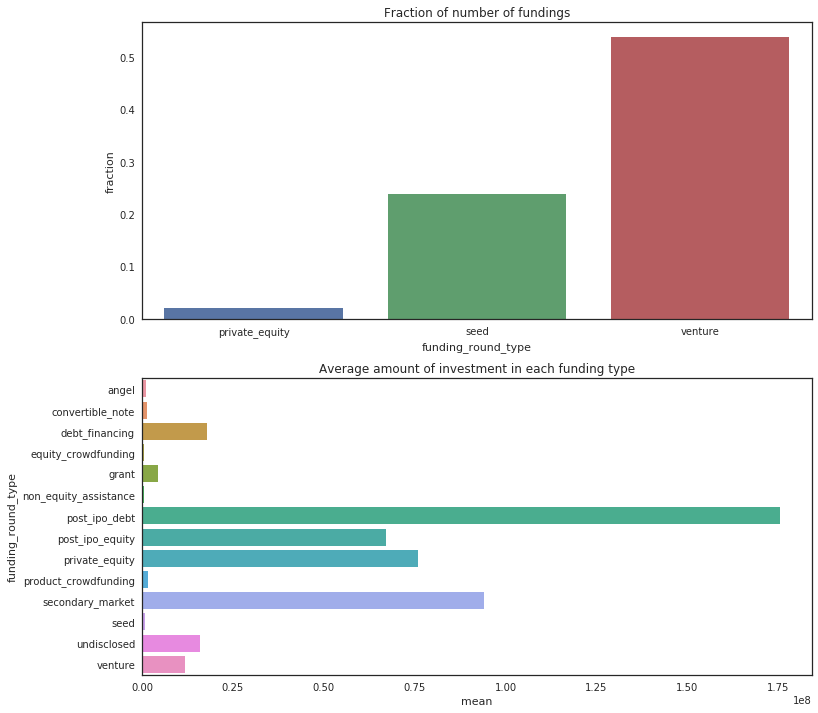

In [154]:
plt.figure(figsize=(12, 12))
#Fraction of number of fundings
plt.subplot(2,1,1)
sns.barplot(x='funding_round_type', y='fraction', data=chart1_plt)
plt.title("Fraction of number of fundings")
#average amount of investment in each funding type
plt.subplot(2,1,2)
sns.barplot(y='funding_round_type', x='mean', data=chart1)
plt.title("Average amount of investment in each funding type")
plt.show()


A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [155]:
temp_top9

,country_code,raised_amount_usd
0,USA,3.999305e+11
1,CHN,3.906671e+10
2,GBR,1.818328e+10
3,IND,1.405060e+10
4,CAN,8.825487e+09
5,FRA,6.775044e+09
6,ISR,6.490721e+09
7,DEU,6.053973e+09
8,JPN,3.237132e+09


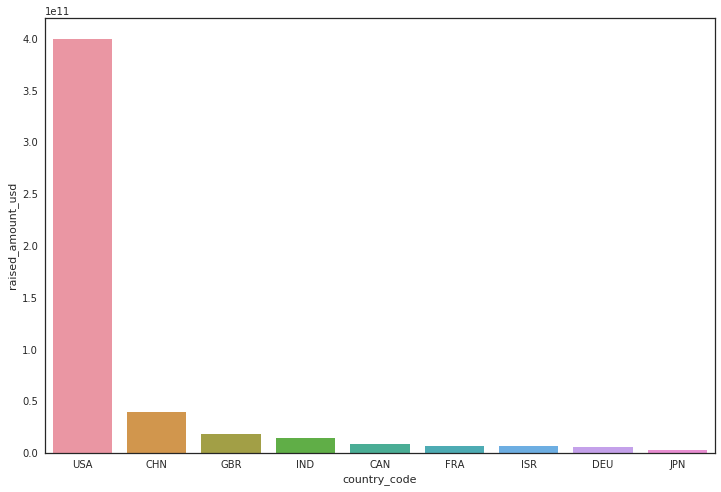

In [156]:
plt.figure(figsize=(12, 8))
sns.barplot(x='country_code', y='raised_amount_usd', data=temp_top9)
plt.show()

    A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

 

In [157]:
main_frm = pd.concat([frm1, frm2, frm3 ], axis = 0)
main_frm

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,no_invt_sec,total_invt_sec
76677,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,24-01-2001,8250000.0,User Interface,http://www.userinterface.com,User Interface,operating,USA,CA,Bakersfield,California City,User Interface,Others,2732,2.441447e+10
76603,/organization/sunverge-energy-inc,/funding-round/2d73b074d01b5d5b1f553eb5cbd8af2c,venture,17-06-2014,15000000.0,"Sunverge Energy, Inc",http://sunverge.com,Commercial Solar|Hardware + Software|Residenti...,operating,USA,CA,CA - Other,Stockton,Commercial Solar,Cleantech / Semiconductors,2145,1.972990e+10
76672,/organization/thredhq,/funding-round/54166cbfbb75fb604c17a94f2205570e,venture,18-09-2013,5000000.0,Thredhq,https://thredhq.com/,Social + Mobile + Local|Social Network Media,operating,USA,CA,SF Bay Area,Berkeley,Social + Mobile + Local,"Social, Finance, Analytics, Advertising",1813,1.590572e+10
76132,/organization/e-leathergroup,/funding-round/d3d71804ec6ff565dfaf89938a657ee8,venture,21-05-2014,8425073.0,E-LeatherGroup,http://www.eleathergroup.com/,Textiles,operating,GBR,K3,Peterborough,Peterborough,Textiles,Others,137,1.189442e+09
76212,/organization/stingray-geophysical,/funding-round/6fdf5c9dc4be9d883a18fdbbe00c6209,venture,23-03-2006,11460000.0,Stingray Geophysical,http://www.stingraygeo.com,Gas|Oil|Services,operating,GBR,N7,London,Guildford,Gas,Cleantech / Semiconductors,114,1.028029e+09
74580,/organization/troux-technologies,/funding-round/468111d06495683fa9db48fae9a4e38e,venture,08-10-2009,10000000.0,Troux Technologies,http://www.troux.com,Career Planning|Enterprise Software|Software,acquired,GBR,B9,London,Slough,Career Planning,"Social, Finance, Analytics, Advertising",95,7.976084e+08
74804,/organization/vserv,/funding-round/6442af712aaab254abcae2fe3fea9bc9,venture,02-03-2015,11000000.0,Vserv,http://vserv.com,Emerging Markets|Mobile Advertising|Mobile Com...,operating,IND,16,Mumbai,Mumbai,Emerging Markets,Others,102,9.342895e+08
76035,/organization/easylink,/funding-round/f92ac5893a7701a416e76b8067f45e95,venture,13-04-2006,5400000.0,EasyLink,http://www.xlweb.com,Web Design|Web Development|Web Hosting,ipo,IND,25,Chennai,Chennai,Web Design,"News, Search and Messaging",49,4.088345e+08
74577,/organization/travelguru,/funding-round/58803fbf70b28cbc0a721859898678d3,venture,29-11-2006,15000000.0,TravelGuru,http://www.travelguru.com,Career Planning|Curated Web|Transportation|Travel,acquired,IND,16,Mumbai,Mumbai,Career Planning,"Social, Finance, Analytics, Advertising",32,2.905435e+08


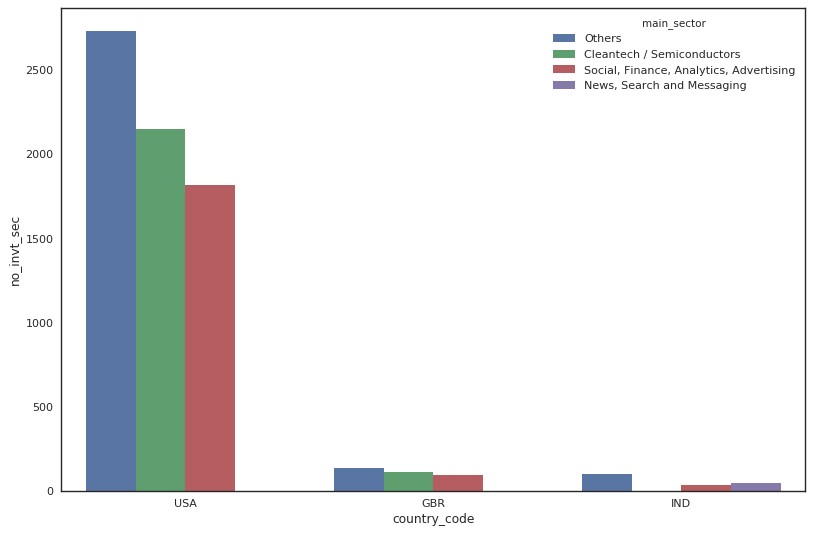

In [158]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='country_code', y='no_invt_sec', hue="main_sector", data=main_frm)
plt.show()